In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.metrics import cdist_dtw
from sklearn.preprocessing import StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn import metrics

C:\Users\Akos\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


# Read data and calculate ratios

In [3]:
df = pd.read_pickle("data/dataframe")

In [4]:
yearsString = ["14", "15", "16", "17", "18", "19", "20"]
arbevetel = ["TAH197"]
koltseg = ["TAC008",
"TAC009","TAC011","TAC010","TAC078","TAH014","TAH015","TAC012","TAC013","TAC014","TAC015","TAC016","TAC018","TAC063","TAH021","TAC109","TAC190","TAC059","TAB024","TAH197"]
merlegfoosszeg=["TAH186",
"TAH230","TAH033","TAH087","TAH088","TAH041","TAH042","TAH231","TAH043","TAH044","TAH232","TAH045", "TAH187", "TAI001",
"TAI002","TAI019","TAI020","TAI022","TAI023","TAI041","TAI042","TAI043","TAI044","TAI033","TAH034","TAI045","TAI046","TAI035","TAI047","TAI048","TAI036","TAI049","TAI050","TAI037","TAI051","TAI052","TAI053","TAI054","TAI055","TAI056","TAI057","TAH190","TAI038","TAI058", "TAB024","TAH197"]
liabilities = ["TAH209","TAH051","TAH227","TAH054","TAH055","TAH180","TAH199"]
toke = ["TAH002","TAH003","TAH004","TAH005","TAH011","TAH007","TAH233","TAH234","TAH012","TAH048","TAH189","TAH208","TAH060","TAH179","TAH187"]

In [5]:
ratios = pd.DataFrame()
for y in yearsString:
    for i in arbevetel:
        ratios[y+i+"arbev"] = df[y+i]/df[y+"TAC002"]
    for i in merlegfoosszeg:
        ratios[y+i+"mf"] = df[y+i]/df[y+"TAH061"]
    for i in liabilities:
        ratios[y+i+"liab"] = df[y+i]/(df[y+"TAH051"]+df[y+"TAH054"])
    for i in toke:
        ratios[y+i+"toke"] = df[y+i]/(df[y+"TAH001"]+df[y+"TAH012"]+df[y+"TAH048"]+df[y+"TAH189"]+df[y+"TAH208"]+df[y+"TAH060"]+df[y+"TAH179"]+df[y+"TAH187"]+df[y+"TAH059"])
    for i in koltseg:
        ratios[y+i+"kolt"] = df[y+i]/(df[y+"TAC002"]+df[y+"TAC006"]-df[y+"TAC019"])
ratios = ratios.replace(np.inf, 0)
ratios = ratios.replace(-np.inf, 0)        
ratios.fillna(0, inplace=True)
        
cRatios = pd.DataFrame()
for y in range(14, 20):
    for i in arbevetel:
        cRatios[str(y)+"c"+str(y+1)+"arbev"] = (ratios[str(y+1)+i+"arbev"]-ratios[str(y)+i+"arbev"])/ratios[str(y)+i+"arbev"]
    for i in merlegfoosszeg:
        cRatios[str(y)+"c"+str(y+1)+"mf"] = (ratios[str(y+1)+i+"mf"]-ratios[str(y)+i+"mf"])/ratios[str(y)+i+"mf"]
    for i in liabilities:
        cRatios[str(y)+"c"+str(y+1)+"liab"] = (ratios[str(y+1)+i+"liab"]-ratios[str(y)+i+"liab"])/ratios[str(y)+i+"liab"]
    for i in toke:
        cRatios[str(y)+"c"+str(y+1)+"toke"] = (ratios[str(y+1)+i+"toke"]-ratios[str(y)+i+"toke"])/ratios[str(y)+i+"toke"]
    for i in koltseg:
        cRatios[str(y)+"c"+str(y+1)+"kolt"] = (ratios[str(y+1)+i+"kolt"]-ratios[str(y)+i+"kolt"])/ratios[str(y)+i+"kolt"]

cRatios = cRatios.replace(np.inf, 0)
cRatios = cRatios.replace(-np.inf, 0)        
cRatios.fillna(0, inplace=True)

<ipython-input-5-9198e4cb8894>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ratios[y+i+"mf"] = df[y+i]/df[y+"TAH061"]
<ipython-input-5-9198e4cb8894>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ratios[y+i+"liab"] = df[y+i]/(df[y+"TAH051"]+df[y+"TAH054"])
<ipython-input-5-9198e4cb8894>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-frag

# PCA analysis

In [21]:
var= []
for i in range(2, 10):
    pca = PCA(n_components=i, svd_solver='full')
    pca.fit(cRatios)
    var.append(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_)

[0.72251734 0.07990208]
[0.72251734 0.07990208 0.0712874 ]
[0.72251734 0.07990208 0.0712874  0.03473617]
[0.72251734 0.07990208 0.0712874  0.03473617 0.01986564]
[0.72251734 0.07990208 0.0712874  0.03473617 0.01986564 0.01632052]
[0.72251734 0.07990208 0.0712874  0.03473617 0.01986564 0.01632052
 0.0148307 ]
[0.72251734 0.07990208 0.0712874  0.03473617 0.01986564 0.01632052
 0.0148307  0.01011579]
[0.72251734 0.07990208 0.0712874  0.03473617 0.01986564 0.01632052
 0.0148307  0.01011579 0.00680576]


In [35]:
pca = PCA(n_components=1, svd_solver='full')
cRatiosReduced = pca.fit_transform(cRatios)

# DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
eps = []
nClusters = []
silScore = []
for i in range(1, 20, 1):
    eps.append(i)
    db = DBSCAN(eps=i/1000, min_samples=10).fit(cRatiosReduced)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    nClusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    score = metrics.silhouette_score(cRatiosReduced, labels)
    print("Silhouette Coefficient: %0.3f" % score)
    print(len(cRatios[labels == 0].index))
    print(i/1000)
    print("-------------------------")
    silScore.append(score)

Estimated number of clusters: 64
Estimated number of noise points: 3331
Silhouette Coefficient: 0.396
1381
0.001
-------------------------
Estimated number of clusters: 55
Estimated number of noise points: 2152
Silhouette Coefficient: 0.525
1424
0.002
-------------------------
Estimated number of clusters: 66
Estimated number of noise points: 1357
Silhouette Coefficient: 0.573
1443
0.003
-------------------------
Estimated number of clusters: 41
Estimated number of noise points: 1092
Silhouette Coefficient: 0.605
1464
0.004
-------------------------
Estimated number of clusters: 23
Estimated number of noise points: 952
Silhouette Coefficient: 0.597
1492
0.005
-------------------------
Estimated number of clusters: 18
Estimated number of noise points: 851
Silhouette Coefficient: 0.616
1565
0.006
-------------------------
Estimated number of clusters: 13
Estimated number of noise points: 791
Silhouette Coefficient: 0.637
1573
0.007
-------------------------
Estimated number of clusters: 

In [58]:
    db = DBSCAN(eps=0.008, min_samples=10).fit(cRatiosReduced)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    nClusters.append(n_clusters_)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    score = metrics.silhouette_score(cRatiosReduced, labels)
    print("Silhouette Coefficient: %0.3f" % score)
    print(len(cRatios[labels == 0].index))
    print("-------------------------")
    silScore.append(score)

Estimated number of clusters: 13
Estimated number of noise points: 748
Silhouette Coefficient: 0.658
1573
-------------------------


In [ ]:
ratios[labels == 1].describe()

# Time series clustering

In [6]:
prodInTime = pd.DataFrame()
for i in range(14, 21): 
    prodInTime[str(i)] = df[str(i)+"Productivity"]
prodInTime = TimeSeriesScalerMeanVariance().fit_transform(prodInTime)

In [11]:
timeSeriesClusterModel = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=5, random_state=15)
timeSeriesClusterModel.fit(prodInTime)
y_pred = timeSeriesClusterModel.predict(prodInTime)
#sc = metrics.cdist_dtw(prodInTime, n_jobs=-1)
#score.append(sc)
#print(1, ": ", sc)

In [6]:
sc = cdist_dtw(prodInTime, n_jobs=-1, verbose = 4)
print(1, ": ", sc)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 601 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1189 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1973 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2953 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3516 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 4129 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 4790 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 5501 tasks     

[Parallel(n_jobs=-1)]: Done 401396 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 407693 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 414038 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 420433 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 426876 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 433369 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 439910 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 446501 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 453140 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 459829 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 466566 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 473353 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 480188 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 487073 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 494006 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Do

[Parallel(n_jobs=-1)]: Done 1580630 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1593101 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1605620 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1618189 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1630806 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1643473 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1656188 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1668953 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1681766 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1694629 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1707540 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1720501 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1733510 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1746569 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1759676 tasks      | elapsed:  2.3min
[Parallel(

[Parallel(n_jobs=-1)]: Done 3519193 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3537788 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3556433 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3575126 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3593869 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3612660 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3631501 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3650390 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3669329 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3688316 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3707353 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3726438 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3745573 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3764756 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3783989 tasks      | elapsed:  4.9min
[Parallel(

[Parallel(n_jobs=-1)]: Done 6223380 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6248101 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6272870 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 6297689 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6322556 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6347473 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 6372438 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 6397453 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 6422516 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 6447629 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6472790 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6498001 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 6523260 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 6548569 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 6573926 tasks      | elapsed:  8.2min
[Parallel(

[Parallel(n_jobs=-1)]: Done 9693193 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 9724038 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 9754933 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 9785876 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 9816869 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 9847910 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 9879001 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 9910140 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 9941329 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 9972566 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 10003853 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 10035188 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 10066573 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 10098006 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 10129489 tasks      | elapsed: 12.5min
[Para

[Parallel(n_jobs=-1)]: Done 13854836 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 13891709 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 13928630 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 13965601 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 14002620 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 14039689 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 14076806 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 14113973 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 14151188 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 14188453 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 14225766 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 14263129 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 14300540 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 14338001 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 14375510 tasks      | elapsed: 17.

[Parallel(n_jobs=-1)]: Done 18757801 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 18800700 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 18843649 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 18886646 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 18929693 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 18972788 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 19015933 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 19059126 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 19102369 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 19145660 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 19189001 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 19232390 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 19275829 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 19319316 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 19362853 tasks      | elapsed: 23.

[Parallel(n_jobs=-1)]: Done 24402086 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 24451013 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 24499988 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 24549013 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 24598086 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 24647209 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 24696380 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 24745601 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 24794870 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 24844189 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 24893556 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 24942973 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 24992438 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 25041953 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 25091516 tasks      | elapsed: 29.

[Parallel(n_jobs=-1)]: Done 30787693 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 30842646 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 30897649 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 30952700 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 31007801 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 31062950 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 31118149 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 31173396 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 31228693 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 31284038 tasks      | elapsed: 37.2min
[Parallel(n_jobs=-1)]: Done 31339433 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 31394876 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 31450369 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 31505910 tasks      | elapsed: 37.5min
[Parallel(n_jobs=-1)]: Done 31561501 tasks      | elapsed: 37.

[Parallel(n_jobs=-1)]: Done 37914620 tasks      | elapsed: 45.4min
[Parallel(n_jobs=-1)]: Done 37975601 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 38036630 tasks      | elapsed: 45.5min
[Parallel(n_jobs=-1)]: Done 38097709 tasks      | elapsed: 45.6min
[Parallel(n_jobs=-1)]: Done 38158836 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 38220013 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 38281238 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 38342513 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 38403836 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done 38465209 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 38526630 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 38588101 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 38649620 tasks      | elapsed: 46.2min
[Parallel(n_jobs=-1)]: Done 38711189 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 38772806 tasks      | elapsed: 46.

[Parallel(n_jobs=-1)]: Done 45782869 tasks      | elapsed: 55.0min
[Parallel(n_jobs=-1)]: Done 45849876 tasks      | elapsed: 55.1min
[Parallel(n_jobs=-1)]: Done 45916933 tasks      | elapsed: 55.2min
[Parallel(n_jobs=-1)]: Done 45984038 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 46051193 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 46118396 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 46185649 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 46252950 tasks      | elapsed: 55.6min
[Parallel(n_jobs=-1)]: Done 46320301 tasks      | elapsed: 55.7min
[Parallel(n_jobs=-1)]: Done 46387700 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 46455149 tasks      | elapsed: 55.9min
[Parallel(n_jobs=-1)]: Done 46522646 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done 46590193 tasks      | elapsed: 56.1min
[Parallel(n_jobs=-1)]: Done 46657788 tasks      | elapsed: 56.1min
[Parallel(n_jobs=-1)]: Done 46725433 tasks      | elapsed: 56.

[Parallel(n_jobs=-1)]: Done 54392438 tasks      | elapsed: 65.5min
[Parallel(n_jobs=-1)]: Done 54465473 tasks      | elapsed: 65.6min
[Parallel(n_jobs=-1)]: Done 54538556 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done 54611689 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 54684870 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 54758101 tasks      | elapsed: 66.0min
[Parallel(n_jobs=-1)]: Done 54831380 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done 54904709 tasks      | elapsed: 66.2min
[Parallel(n_jobs=-1)]: Done 54978086 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 55051513 tasks      | elapsed: 66.4min
[Parallel(n_jobs=-1)]: Done 55124988 tasks      | elapsed: 66.4min
[Parallel(n_jobs=-1)]: Done 55198513 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 55272086 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 55345709 tasks      | elapsed: 66.7min
[Parallel(n_jobs=-1)]: Done 55419380 tasks      | elapsed: 66.

[Parallel(n_jobs=-1)]: Done 63743329 tasks      | elapsed: 76.7min
[Parallel(n_jobs=-1)]: Done 63822390 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 63901501 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 63980660 tasks      | elapsed: 76.9min
[Parallel(n_jobs=-1)]: Done 64059869 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 64139126 tasks      | elapsed: 77.1min
[Parallel(n_jobs=-1)]: Done 64218433 tasks      | elapsed: 77.2min
[Parallel(n_jobs=-1)]: Done 64297788 tasks      | elapsed: 77.3min
[Parallel(n_jobs=-1)]: Done 64377193 tasks      | elapsed: 77.4min
[Parallel(n_jobs=-1)]: Done 64456646 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 64536149 tasks      | elapsed: 77.5min
[Parallel(n_jobs=-1)]: Done 64615700 tasks      | elapsed: 77.6min
[Parallel(n_jobs=-1)]: Done 64695301 tasks      | elapsed: 77.7min
[Parallel(n_jobs=-1)]: Done 64774950 tasks      | elapsed: 77.8min
[Parallel(n_jobs=-1)]: Done 64854649 tasks      | elapsed: 77.

[Parallel(n_jobs=-1)]: Done 73835540 tasks      | elapsed: 88.9min
[Parallel(n_jobs=-1)]: Done 73920629 tasks      | elapsed: 89.0min
[Parallel(n_jobs=-1)]: Done 74005766 tasks      | elapsed: 89.1min
[Parallel(n_jobs=-1)]: Done 74090953 tasks      | elapsed: 89.2min
[Parallel(n_jobs=-1)]: Done 74176188 tasks      | elapsed: 89.3min
[Parallel(n_jobs=-1)]: Done 74261473 tasks      | elapsed: 89.4min
[Parallel(n_jobs=-1)]: Done 74346806 tasks      | elapsed: 89.5min
[Parallel(n_jobs=-1)]: Done 74432189 tasks      | elapsed: 89.6min
[Parallel(n_jobs=-1)]: Done 74517620 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done 74603101 tasks      | elapsed: 89.8min
[Parallel(n_jobs=-1)]: Done 74688630 tasks      | elapsed: 89.9min
[Parallel(n_jobs=-1)]: Done 74774209 tasks      | elapsed: 90.0min
[Parallel(n_jobs=-1)]: Done 74859836 tasks      | elapsed: 90.1min
[Parallel(n_jobs=-1)]: Done 74945513 tasks      | elapsed: 90.2min
[Parallel(n_jobs=-1)]: Done 75031238 tasks      | elapsed: 90.

[Parallel(n_jobs=-1)]: Done 84578006 tasks      | elapsed: 102.3min
[Parallel(n_jobs=-1)]: Done 84669073 tasks      | elapsed: 102.4min
[Parallel(n_jobs=-1)]: Done 84760188 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done 84851353 tasks      | elapsed: 102.7min
[Parallel(n_jobs=-1)]: Done 84942566 tasks      | elapsed: 102.8min
[Parallel(n_jobs=-1)]: Done 85033829 tasks      | elapsed: 102.9min
[Parallel(n_jobs=-1)]: Done 85125140 tasks      | elapsed: 103.0min
[Parallel(n_jobs=-1)]: Done 85216501 tasks      | elapsed: 103.1min
[Parallel(n_jobs=-1)]: Done 85307910 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-1)]: Done 85399369 tasks      | elapsed: 103.3min
[Parallel(n_jobs=-1)]: Done 85490876 tasks      | elapsed: 103.5min
[Parallel(n_jobs=-1)]: Done 85582433 tasks      | elapsed: 103.6min
[Parallel(n_jobs=-1)]: Done 85674038 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 85765693 tasks      | elapsed: 103.8min
[Parallel(n_jobs=-1)]: Done 85857396 tasks      

[Parallel(n_jobs=-1)]: Done 95952793 tasks      | elapsed: 116.6min
[Parallel(n_jobs=-1)]: Done 96049788 tasks      | elapsed: 116.7min
[Parallel(n_jobs=-1)]: Done 96146833 tasks      | elapsed: 116.8min
[Parallel(n_jobs=-1)]: Done 96167646 out of 96167646 | elapsed: 116.8min finished


1 :  [[0.         1.66774685 2.04788581 ... 2.7852347  1.94955374 2.34799504]
 [1.66774685 0.         3.13730703 ... 1.97431256 1.59117646 1.7896097 ]
 [2.04788581 3.13730703 0.         ... 3.20314151 2.42630972 2.03091949]
 ...
 [2.7852347  1.97431256 3.20314151 ... 0.         2.04150781 1.60925845]
 [1.94955374 1.59117646 2.42630972 ... 2.04150781 0.         2.56686278]
 [2.34799504 1.7896097  2.03091949 ... 1.60925845 2.56686278 0.        ]]


In [10]:
np.save("distanceMatrix", sc)

In [8]:
sc = np.load("distanceMatrix.npy")

In [13]:
metrics.silhouette_score(sc, labels=y_pred, metric="precomputed")

0.1751320377522662

2 :  0.3659194230194772


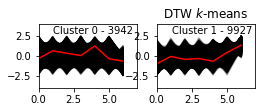

3 :  0.29078689929559653


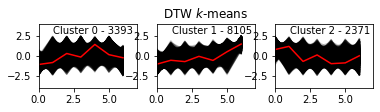

4 :  0.26565997878719405


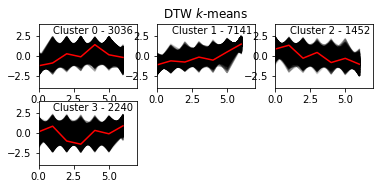

5 :  0.1751320377522662


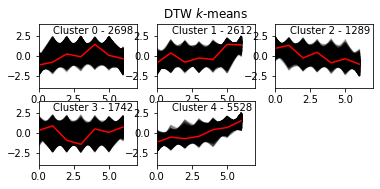

6 :  0.1462199975158793


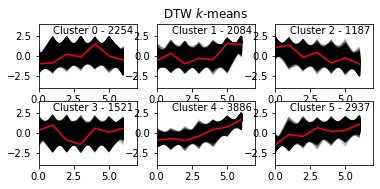

7 :  0.14609049032478355


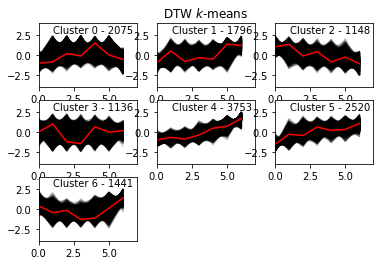

8 :  0.11998101345637202


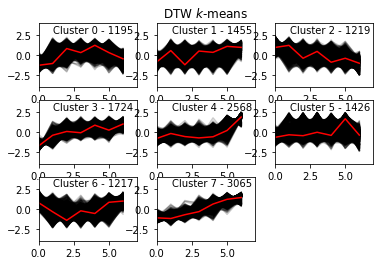

9 :  0.11855180347300828


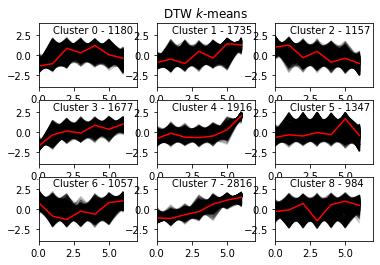

10 :  0.12049228166469256


ValueError: num must be 1 <= num <= 9, not 10

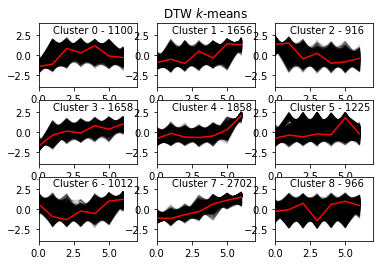

In [10]:
score = []
for k in range(2, 16):
    timeSeriesClusterModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", max_iter=5, random_state=15)
    timeSeriesClusterModel.fit(prodInTime)
    y_pred = timeSeriesClusterModel.predict(prodInTime)
    shScore = metrics.silhouette_score(sc, labels=y_pred, metric="precomputed")
    score.append(shScore)
    print(k, ": ", shScore)
    plt.figure()
    for yi in range(0, k):
        plt.subplot(3, 3, yi + 1)
        for xx in prodInTime[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(timeSeriesClusterModel.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, prodInTime.shape[1])
        plt.ylim(-4, 4)
        plt.text(0.15, 0.85,('Cluster {0} - {1}').format(yi, len(prodInTime[y_pred == yi])),
             transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("DTW $k$-means")
    plt.show()

In [12]:
score

[0.3659194230194772,
 0.29078689929559653,
 0.26565997878719405,
 0.1751320377522662,
 0.1462199975158793,
 0.14609049032478355,
 0.11998101345637202,
 0.11855180347300828,
 0.12049228166469256]

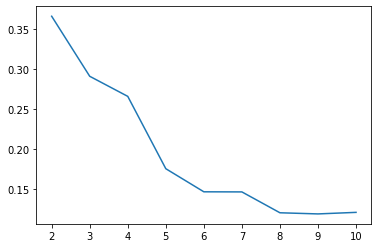

In [13]:
plt.plot(range(2, 11), score)

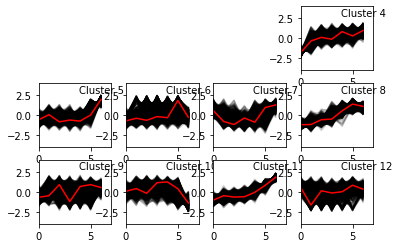

In [155]:
plt.figure()
for yi in range(3, 12):
    plt.subplot(3, 4, yi + 1)
    for xx in prodInTime[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(timeSeriesClusterModel.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, prodInTime.shape[1])
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [116]:
cluster8 = df[y_pred == 7].copy()
cluster8.describe()[["14Productivity", "20Productivity"]]

Meta,14Productivity,20Productivity
count,1895.000000,1.895000e+03
mean,5553.448804,1.302556e+04
std,14761.976491,6.053745e+04
min,-23016.949640,-1.131314e+04
25%,2190.142534,4.336977e+03
50%,3442.344828,6.884233e+03
75%,5691.671029,1.101394e+04
max,390308.083333,1.907087e+06


TAF050	Tao.tv.sz.tartós adom.többletkedv.  
TAH034	Beruházások nettó értéke  
TAF019	Egyéb adózás elõtti erdm. növ. tét.  
TAE019	Egyéb adózás elõtti erdm.csökk.tét.  
TAH180	Rövid lejáratú köt.:tul.szembeni  
TAF001	Egyéb ráford-ként elszámolt céltart

In [117]:
cluster8["totalProdInc"] = (cluster8["20Productivity"]-cluster8["14Productivity"])/cluster8["14Productivity"]
cluster8.corr()["totalProdInc"].sort_values(ascending=False, key = lambda col: abs(col)).head(30)

Meta
totalProdInc         1.000000
17TAF050             0.584747
14c15Productivity    0.557853
15TAH034             0.543973
15TAF019             0.528635
16TAE019             0.518125
18TAH180             0.505227
15TAI033             0.492615
17TAH180             0.473347
17TAF001             0.459939
18TAE019             0.457671
19TAH180             0.428145
15TAE019             0.423589
18TAF050             0.387526
16TAH034             0.375021
16TAF001             0.368922
14TAH034             0.364079
14TAI033             0.354219
16TAI033             0.339988
19TAE051             0.335480
20TAF050             0.325227
14TAE019             0.259555
17TAI023             0.249151
16TAI023             0.247180
20TAH059             0.235285
19TAF050             0.229278
17TAE002             0.225449
19TAH007             0.220279
14TAF001             0.217638
17TAH059             0.215441
Name: totalProdInc, dtype: float64

TAH007	Jegyzett tõkébõl külf.  részesedés  
TAH189	Eredménytartalék  
TAH048	Tõketartalék záróállománya  
TAH208	Lekötött tartalék  
TAB024	Fizetett, jóváhagyott oszt., rész.

In [118]:
cluster8R = ratios[y_pred == 7].copy()
cluster8R["totalProdInc"] = (cluster8["20Productivity"]-cluster8["14Productivity"])/cluster8["14Productivity"]
cluster8R.corr()["totalProdInc"].sort_values(ascending=False, key = lambda col: abs(col)).head(30)

totalProdInc    1.000000
14TAH007toke    0.541964
14TAH189toke   -0.511943
17TAH048toke    0.503674
14TAH048toke    0.477110
17TAH189toke   -0.466884
14TAH208toke    0.432202
17TAH208toke    0.418334
17TAH007toke    0.309896
14TAH187toke   -0.306730
16TAB024kolt    0.206577
19TAH208toke    0.182092
19TAH189toke   -0.120998
20TAH208toke    0.112951
15TAH197kolt    0.111992
20TAH189toke   -0.109271
20TAH007toke    0.105560
15TAH014kolt    0.101060
17TAH004toke   -0.101008
17TAH187toke   -0.093145
18TAH048toke    0.091467
17TAH180liab    0.088272
17TAH005toke   -0.087131
15TAC008kolt    0.086029
14TAH087mf      0.084595
15TAC009kolt    0.081852
16TAH005toke   -0.080500
20TAH048toke    0.073534
14TAH034mf      0.071857
19TAH005toke   -0.071683
Name: totalProdInc, dtype: float64